In [ ]:
#drive mounted
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#we imported the nltk library
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#location to Janet and Tahmina folder
%cd 'drive/My Drive/PTS3 Summer 2020/Janet and Tahmina'

/content/drive/.shortcut-targets-by-id/19mRvebkmUJMU9AlduvUZbsu8Ds7bAR11/PTS3 Summer 2020/Janet and Tahmina


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/19mRvebkmUJMU9AlduvUZbsu8Ds7bAR11/PTS3 Summer 2020/Janet and Tahmina


In [ ]:
#reads the lyrics.csv file
import pandas as pd
test_data = pd.read_csv('lyrics.csv')
test_data
#dataset.drop(dataset.columns[[0,1,2,3,4,10,11,12]], axis=1)





,song,year,artist,genre,lyrics
0,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\nIt ...
1,careless-whisper,2009,a,Hip-Hop,I feel so unsure\nAs I take your hand and lead...
2,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...
3,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\nI threw away m...
4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...
...,...,...,...,...,...
125710,white-light,2012,the-ghost-inside,Metal,You left some hope instilled in me\nThat I nev...
125711,outlive,2012,the-ghost-inside,Metal,We're so disconnected but not misdirected.\nTh...
125712,thirty-three,2012,the-ghost-inside,Metal,"I was lead to believe, but now I know for sure..."
125713,face-value,2012,the-ghost-inside,Metal,Featuring: Andrew Neufeld aka The Goose from C...


In [ ]:
#displays the emotion lexicon
filepath = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t', keep_default_na=False)
emolex_df.head(12)

,word,emotion,association
0,abandonment,negative,1
1,abandonment,positive,0
2,abandonment,sadness,1
3,abandonment,surprise,1
4,abandonment,trust,0
5,abate,anger,0
6,abate,anticipation,0
7,abate,disgust,0
8,abate,fear,0
9,abate,joy,0


In [ ]:
#reshapes the emotion lexicon
emolex = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,abandonment,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0
1,abate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,abatement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,abba,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,abbot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# example of removing the stop words for the lyrics of one song
print('English Stopwords: ',stopwords.words('english'))
print('*******************************')
print('')
print('')

# Very first lyrics from the dataset
lyrics1 = "When you were lonely, you needed a man Someone to lean on, well I understand It's only natural But why did it have to be me? Nights can be empty, nights can be cold So you were looking for someone to hold That's only natural But why did it have to be me? I was so lonesome, I was blue I couldn't help it, it had to be you and I Always thought you knew the reason why I only wanted a little love affair Now I can see you are beginning to care But baby, believe me It's better to forget me Men are toys in the game that you play When you get tired, you throw them away That's only natural But why did it have to be me? Falling in love with a woman like you Happens so quickly, there's nothing to do It's only natural But why did it have to be me? I was so lonesome, I was blue I couldn't help it, it had to be you and I Always thought you knew the reason why I only wanted a little love affair Now I can see you are beginning to care But baby, believe me It's better to forget me."
text_tokens = word_tokenize(lyrics1)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]


print("Text_tokens: ",text_tokens)
print("*******************************")
print('')
print('')
print( "Tokens_without_sw: ",tokens_without_sw)

English Stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sa

In [ ]:
# this is a list of words that show up in the emotion lexicon dataset
emolex_words = emolex['word'].tolist()
emolex_words

['abandonment',
 'abate',
 'abatement',
 'abba',
 'abbot',
 'abbreviate',
 'abbreviation',
 'abdomen',
 'abdominal',
 'abduction',
 'aberrant',
 'aberration',
 'abeyance',
 'abhor',
 'abhorrent',
 'abide',
 'ability',
 'abject',
 'ablation',
 'ablaze',
 'abnormal',
 'aboard',
 'abode',
 'abolish',
 'abolition',
 'abominable',
 'abomination',
 'aboriginal',
 'abort',
 'abortion',
 'abortive',
 'abound',
 'abovementioned',
 'abrasion',
 'abroad',
 'abrogate',
 'abrupt',
 'abruptly',
 'abscess',
 'absence',
 'absent',
 'absentee',
 'absenteeism',
 'absinthe',
 'absolute',
 'absolution',
 'absorbed',
 'absorbent',
 'absorbing',
 'absorption',
 'abstain',
 'abstention',
 'abstinence',
 'abstract',
 'abstraction',
 'absurd',
 'absurdity',
 'abundance',
 'abundant',
 'abuse',
 'abutment',
 'aby',
 'abysmal',
 'abyss',
 'academic',
 'academy',
 'accede',
 'accelerate',
 'acceleration',
 'accent',
 'accentuate',
 'accept',
 'acceptable',
 'acceptance',
 'access',
 'accessible',
 'accession',
 '

In [ ]:
#emotions which matches the array
emotions = emolex.columns.tolist()[1:]
emotions

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust']

In [ ]:
import numpy as np
# variable represents a list of the emotions
emotion_col = []


for song_lyrics in test_data['lyrics'].tolist():
  #removes the stop words for each song
  text_tokens = word_tokenize(song_lyrics)
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]

  total_emotion_count = np.zeros((10,))
  # searches up the words of the lyrics in the emotion lexicon and adds up the times each emotion appears for each song
  for word in tokens_without_sw:
    if word in emolex_words:
      x = emolex[emolex.word == word].to_numpy()[0, 1:]
      total_emotion_count = total_emotion_count + emolex[emolex.word == word].to_numpy()[0, 1:]
  #shows the max amount of an emotion appearing
  indices = [i for i, j in enumerate(list(total_emotion_count)) if j == max(total_emotion_count)]

  song_emotions = ""
  for i in indices:
     song_emotions = song_emotions + emotions[i] + " "

  emotion_col.append(song_emotions)
#adds a new column which shows the emotions for each song
test_data['emotion'] = emotion_col
test_data

,song,year,artist,genre,lyrics,emotion
0,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\nIt ...,anticipation
1,careless-whisper,2009,a,Hip-Hop,I feel so unsure\nAs I take your hand and lead...,positive
2,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,positive
3,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\nI threw away m...,positive
4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...,joy positive
...,...,...,...,...,...,...
125710,white-light,2012,the-ghost-inside,Metal,You left some hope instilled in me\nThat I nev...,negative
125711,outlive,2012,the-ghost-inside,Metal,We're so disconnected but not misdirected.\nTh...,negative
125712,thirty-three,2012,the-ghost-inside,Metal,"I was lead to believe, but now I know for sure...",anger negative
125713,face-value,2012,the-ghost-inside,Metal,Featuring: Andrew Neufeld aka The Goose from C...,positive


In [ ]:
#save this new modified data into lyrics_emotion_v1.csv
#test_data.to_csv('lyrics_emotion_v1.csv')
lyrics_emotion_dataset = pd.read_csv('lyrics_emotion_v1.csv')
lyrics_emotion_dataset
#after this read the csv file

,Unnamed: 0,song,year,artist,genre,lyrics,emotion
0,0,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\nIt ...,anticipation
1,1,careless-whisper,2009,a,Hip-Hop,I feel so unsure\nAs I take your hand and lead...,positive
2,2,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...,positive
3,3,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\nI threw away m...,positive
4,4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...,joy positive
...,...,...,...,...,...,...,...
125710,125710,white-light,2012,the-ghost-inside,Metal,You left some hope instilled in me\nThat I nev...,negative
125711,125711,outlive,2012,the-ghost-inside,Metal,We're so disconnected but not misdirected.\nTh...,negative
125712,125712,thirty-three,2012,the-ghost-inside,Metal,"I was lead to believe, but now I know for sure...",anger negative
125713,125713,face-value,2012,the-ghost-inside,Metal,Featuring: Andrew Neufeld aka The Goose from C...,positive


In [ ]:
emotion_count_num = lyrics_emotion_dataset['emotion'].tolist()
emotion_count_num

['anticipation ',
 'positive ',
 'positive ',
 'positive ',
 'joy positive ',
 'positive ',
 'negative ',
 'negative ',
 'negative ',
 'trust ',
 'positive ',
 'sadness ',
 'negative ',
 'positive ',
 'negative ',
 'negative ',
 'positive ',
 'trust ',
 'anticipation ',
 'negative ',
 'negative ',
 'sadness ',
 'negative ',
 'positive ',
 'negative ',
 'anticipation negative ',
 'negative ',
 'positive ',
 'negative ',
 'negative ',
 'negative ',
 'positive ',
 'negative ',
 'disgust negative ',
 'joy positive ',
 'trust ',
 'positive ',
 'negative ',
 'positive ',
 'positive ',
 'positive ',
 'positive ',
 'negative ',
 'positive ',
 'negative positive ',
 'fear ',
 'fear trust ',
 'negative ',
 'positive ',
 'anticipation ',
 'negative ',
 'anticipation ',
 'anticipation ',
 'positive ',
 'positive ',
 'negative ',
 'anticipation ',
 'positive ',
 'positive ',
 'negative ',
 'positive ',
 'anticipation ',
 'positive ',
 'positive ',
 'negative ',
 'negative ',
 'fear ',
 'anger ',
 '

In [ ]:
emotion_count = lyrics_emotion_dataset['emotion'].value_counts().sort_values(ascending=False).head(10)
emotion_count

positive                  44729
negative                  39676
anticipation               8474
joy positive               5793
negative positive          3012
fear                       2413
trust                      2313
negative sadness           2076
sadness                    1748
anticipation positive      1622
Name: emotion, dtype: int64

Text(0.5, 1.0, 'Top 10 Emotion Combinations that Appeared in the Lyrics Dataset')

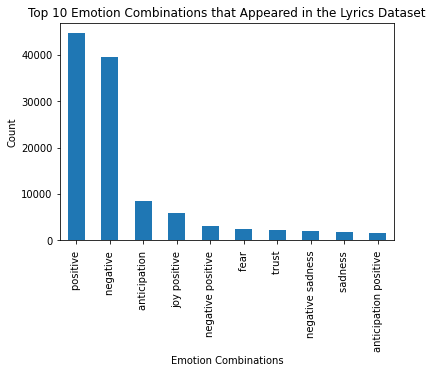

In [ ]:
#Observation: we can see that there are more positive emotions shown
import matplotlib.pyplot as plt
emotion_count.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Emotion Combinations')
plt.title('Top 10 Emotion Combinations that Appeared in the Lyrics Dataset')

In [ ]:
from collections import Counter
lyrics_emotion_dataset['emotion']=lyrics_emotion_dataset['emotion'].apply(str)
#https://stackoverflow.com/questions/43727583/re-sub-erroring-with-expected-string-or-bytes-like-object
entire_emotion_list = []
for emotion_string in lyrics_emotion_dataset['emotion']:
  entire_emotion_list = entire_emotion_list + word_tokenize(emotion_string)

my_count = Counter(entire_emotion_list)
my_count

Counter({'anger': 2459,
         'anticipation': 14440,
         'disgust': 1537,
         'fear': 6735,
         'joy': 9433,
         'nan': 7,
         'negative': 52487,
         'positive': 62491,
         'sadness': 6827,
         'surprise': 2637,
         'trust': 6894})

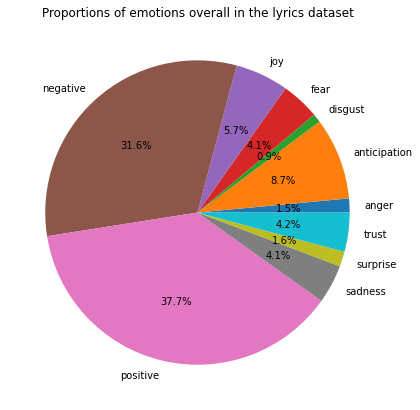

In [ ]:
from matplotlib import pyplot as plt
emotions_names = ['anger', 'anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust']

data = [2459,14440,1537,6735,9433,52487,62491,6827,2637,6894]

# Creating plot
fig = plt.figure(figsize =(10, 7))
#plt.pie(data, labels = emotions_names)
plt.pie(data, labels = emotions_names, autopct='%1.1f%%')
plt.title('Proportions of emotions overall in the lyrics dataset')
plt.show()
#https://stackoverflow.com/questions/25950695/how-to-generate-pie-chart-using-dict-values-in-python-3-4
#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# proportion of emotions overall in the dataset

In [ ]:
year_1970 = lyrics_emotion_dataset.loc[lyrics_emotion_dataset['year'] == 1970]
year_1970

,Unnamed: 0,song,year,artist,genre,lyrics,emotion
25545,25545,aren-t-you-glad,1970,beach-boys,Rock,Today could be a lot of fun\nAnd precious one\...,anticipation positive
25546,25546,god-only-knows,1970,beach-boys,Rock,I may not always love you\nBut long as there a...,trust
25547,25547,their-hearts-were-full-of-spring,1970,beach-boys,Rock,There's a story told of a very gentle boy\nAnd...,positive
25548,25548,wouldn-t-it-be-nice,1970,beach-boys,Rock,Wouldn't it be nice if we were older?\nThen we...,positive
25549,25549,wake-the-world,1970,beach-boys,Rock,One by one the stars appear\nThe light of the ...,positive
...,...,...,...,...,...,...,...
122428,122428,often-as-i-may,1970,grace-slick,Rock,"I love him,\nas often as I may,\nand I will gi...",positive
122429,122429,outlaw-blues,1970,grace-slick,Rock,Ain't it hard when you stumble\nAnd land in so...,positive
122430,122430,father-bruce,1970,grace-slick,Rock,He's a lonely preacher and he lives at the Swi...,negative positive
122431,122431,darkly-smiling,1970,grace-slick,Rock,Darkly Smiling\nDarkly smiling\nThere are no t...,sadness


In [ ]:
from collections import Counter
year_1970['emotion']=year_1970['emotion'].apply(str)
#https://stackoverflow.com/questions/43727583/re-sub-erroring-with-expected-string-or-bytes-like-object
year_1970_emotion_list = []
for emotion_string_1 in year_1970['emotion']:
  year_1970_emotion_list = year_1970_emotion_list + word_tokenize(emotion_string_1)

count_1970 = Counter(year_1970_emotion_list)
count_1970

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Counter({'anger': 1,
         'anticipation': 16,
         'disgust': 1,
         'fear': 3,
         'joy': 14,
         'negative': 38,
         'positive': 66,
         'sadness': 12,
         'surprise': 2,
         'trust': 6})

In [ ]:
year_1980 = lyrics_emotion_dataset.loc[lyrics_emotion_dataset['year'] == 1980]
year_1980

,Unnamed: 0,song,year,artist,genre,lyrics,emotion
4831,4831,your-sweet-love,1980,al-jarreau,Jazz,And when I thought\nMy flame was out\nYou ente...,positive
4832,4832,spain-i-can-recall,1980,al-jarreau,Jazz,"Yesterday, just a\nPhotograph of yesterday\nAn...",joy positive
4833,4833,alonzo,1980,al-jarreau,Jazz,And when I think of Alonzo-\nHe was king aroun...,positive
4834,4834,gimme-what-you-got,1980,al-jarreau,Jazz,We made it through\nThe stormy weather\nWe pro...,positive
4835,4835,love-is-real,1980,al-jarreau,Jazz,You think that love\nIs just a fairy tale\nMay...,positive
...,...,...,...,...,...,...,...
117637,117637,love-dance,1980,george-benson,Jazz,From too much talk to silent touches\nSweet to...,positive
117638,117638,midnight-love-affair,1980,george-benson,Jazz,You stare at him at night and think of schemes...,positive
117639,117639,give-me-the-night,1980,george-benson,Jazz,Whenever dark has fallen\nYou know the spirit ...,positive
117640,117640,turn-out-the-lamplight,1980,george-benson,Jazz,Comin' home is always joy to me\nAin't a place...,joy positive


In [ ]:
from collections import Counter
year_1980['emotion']=year_1980['emotion'].apply(str)
#https://stackoverflow.com/questions/43727583/re-sub-erroring-with-expected-string-or-bytes-like-object
year_1980_emotion_list = []
for emotion_string_2 in year_1980['emotion']:
  year_1980_emotion_list = year_1980_emotion_list + word_tokenize(emotion_string_2)

count_1980 = Counter(year_1980_emotion_list)
count_1980

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Counter({'anger': 6,
         'anticipation': 18,
         'disgust': 2,
         'fear': 5,
         'joy': 20,
         'negative': 49,
         'positive': 86,
         'sadness': 9,
         'surprise': 6,
         'trust': 8})

In [ ]:
year_1990 = lyrics_emotion_dataset.loc[lyrics_emotion_dataset['year'] == 1990]
year_1990

,Unnamed: 0,song,year,artist,genre,lyrics,emotion
480,480,and-you-tell-me,1990,a-ha,Pop,"Please don't hurt me, I have told you\nAll my ...",joy positive
481,481,the-sun-always-shines-on-t-v,1990,a-ha,Pop,Touch me\nHow can it be\nBelieve me\nThe sun a...,negative positive
482,482,blue-sky,1990,a-ha,Pop,The blue sky (blue sky)\nThe blue sky (blue sk...,positive
483,483,living-a-boy-s-adventure-tale,1990,a-ha,Pop,I've fixed my dwelling for the night\nLights i...,positive
484,484,here-i-stand-and-face-the-rain,1990,a-ha,Pop,"Help me, I need your love\nDon't walk away\nTh...",anticipation
...,...,...,...,...,...,...,...
125192,125192,chug-all-night,1990,the-eagles,Rock,You scare me a bit\nBut that's all right\nYou ...,positive
125193,125193,those-shoes,1990,the-eagles,Rock,"Tell us what you're gonna do tonight, momma\nT...",positive
125194,125194,out-of-control,1990,the-eagles,Rock,"Oh, my, don't the sky look spacious\nWith the ...",positive
125195,125195,lyin-eyes,1990,the-eagles,Rock,City girls just seem to find out early\nHow to...,fear


In [ ]:
from collections import Counter
year_1990['emotion']=year_1990['emotion'].apply(str)
#https://stackoverflow.com/questions/43727583/re-sub-erroring-with-expected-string-or-bytes-like-object
year_1990_emotion_list = []
for emotion_string_3 in year_1990['emotion']:
  year_1990_emotion_list = year_1990_emotion_list + word_tokenize(emotion_string_3)

count_1990 = Counter(year_1990_emotion_list)
count_1990

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Counter({'anger': 14,
         'anticipation': 94,
         'disgust': 9,
         'fear': 36,
         'joy': 80,
         'negative': 262,
         'positive': 450,
         'sadness': 49,
         'surprise': 16,
         'trust': 50})

In [ ]:
year_2000 = lyrics_emotion_dataset.loc[lyrics_emotion_dataset['year'] == 2000]
year_2000

,Unnamed: 0,song,year,artist,genre,lyrics,emotion
45,45,she-said,2000,a,Hip-Hop,She said I don't wanna go out chasing\nI kinda...,fear
46,46,warning,2000,a,Hip-Hop,"It's a warning, that's as far as we go\nSave i...",fear trust
47,47,getting-around,2000,a,Hip-Hop,All of your friends are famous\nYou're the man...,negative
48,48,hopper-jonnus-fang,2000,a,Hip-Hop,"I want to feel important, want to think I'm wo...",positive
49,49,here-we-go-again-i-love-lake-tahoe,2000,a,Hip-Hop,"So I've been told\nA long, long time ago\nA gi...",anticipation
...,...,...,...,...,...,...,...
125146,125146,funk-49,2000,the-eagles,Rock,Jeremiah was a bullfrog\nWas a good friend of ...,positive
125147,125147,dirty-laundry,2000,the-eagles,Rock,I make my living off the evening news\nJust gi...,negative
125148,125148,all-she-wants-to-do-is-dance,2000,the-eagles,Rock,They're picking up the prisoners\nand putting ...,positive
125149,125149,long-run-leftovers,2000,the-eagles,Rock,"I used to hurry a lot, I used to worry a lot,\...",anticipation


In [ ]:
from collections import Counter
year_2000['emotion']=year_2000['emotion'].apply(str)
#https://stackoverflow.com/questions/43727583/re-sub-erroring-with-expected-string-or-bytes-like-object
year_2000_emotion_list = []
for emotion_string_4 in year_2000['emotion']:
  year_2000_emotion_list = year_2000_emotion_list + word_tokenize(emotion_string_4)

count_2000 = Counter(year_2000_emotion_list)
count_2000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Counter({'anger': 22,
         'anticipation': 92,
         'disgust': 13,
         'fear': 36,
         'joy': 57,
         'negative': 255,
         'positive': 345,
         'sadness': 49,
         'surprise': 22,
         'trust': 50})

In [ ]:
year_2010 = lyrics_emotion_dataset.loc[lyrics_emotion_dataset['year'] == 2010]
year_2010

,Unnamed: 0,song,year,artist,genre,lyrics,emotion
178,178,this-is-the-house-that-doubt-built,2010,a-day-to-remember,Pop,Don't get me started on what it means to be al...,positive
179,179,all-signs-point-to-lauderdale,2010,a-day-to-remember,Pop,"I hate this town, it's so washed up\nAnd all m...",negative
180,180,all-i-want,2010,a-day-to-remember,Pop,I'm always screaming my lungs out 'til my head...,negative
181,181,2nd-sucks,2010,a-day-to-remember,Pop,Fight!\nYou're afraid\nLike I make my deals wi...,anticipation trust
182,182,byou-should-ve-killed-me-when-you-had-the-chance,2010,a-day-to-remember,Pop,So I say goodbye to a town that has ears and e...,negative
...,...,...,...,...,...,...,...
125585,125585,boxer,2010,the-gaslight-anthem,Rock,Got your pride and your prose\nTucked just lik...,positive
125586,125586,the-queen-of-lower-chelsea,2010,the-gaslight-anthem,Rock,Did you grow up lonesome and one of a kind?\nW...,positive
125587,125587,bring-it-on,2010,the-gaslight-anthem,Rock,My queen of the Bronx\nBlue eyes and spitfire\...,joy positive
125588,125588,even-cowgirls-get-the-blues,2010,the-gaslight-anthem,Rock,"I haven't seen Sandy, Angry Johnny, or Mary\nI...",joy positive


In [ ]:
from collections import Counter
year_2010['emotion']=year_2010['emotion'].apply(str)
#https://stackoverflow.com/questions/43727583/re-sub-erroring-with-expected-string-or-bytes-like-object
year_2010_emotion_list = []
for emotion_string_5 in year_2010['emotion']:
  year_2010_emotion_list = year_2010_emotion_list + word_tokenize(emotion_string_5)

count_2010 = Counter(year_2010_emotion_list)
count_2010

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Counter({'anger': 68,
         'anticipation': 484,
         'disgust': 35,
         'fear': 200,
         'joy': 249,
         'negative': 1824,
         'positive': 1943,
         'sadness': 225,
         'surprise': 70,
         'trust': 201})

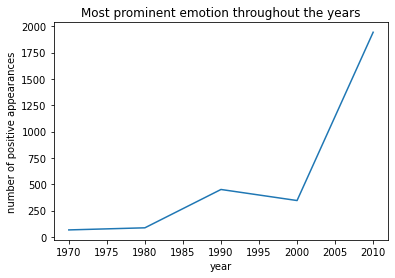

In [ ]:
import matplotlib.pyplot as plt
Year = [1970,1980,1990,2000,2010]
Number_of_most_prominent_emotion_appearences = [66,86,450,345,1943]
plt.plot(Year,Number_of_most_prominent_emotion_appearences)
plt.xlabel('year')
plt.ylabel('number of positive appearances')
plt.title('Most prominent emotion throughout the years')
plt.show()

In [ ]:
# maybe look at the most prominent emotion(s) in different years
# so this would be the same process as before, but only looking at one year at a time, first select for that particular year, and then do the process
#--> if you don't want to do all the years, maybe choose interval years --> 1950-1959, 1960-1969.... 2000s, 2010s

#  https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas/40442778

In [ ]:
# from email to Janet (might be interesting to include in write up)

# This might be of interest as well - the fact that there are 371 (b/c that's the length of the output as indicated in your screenshot) distinctly different emotion combinations in your entire dataset.

# What might also be of interest is counting up the number of different lengths of the list of emotions - like how many songs were categorized in only one emotion, two emotions, three, etc. This would be an interesting statistic to look into.